  <style>
    .container {
      display: flex;
      gap: 10px; /* Optional spacing between divs */
    }

    .box h1 {
      font-size: 50px;
      font-weight: 600;
    }
  </style>
  <div class="container" style="">
    <div class="box">
      <h1>Planning for Robotics</h1>
    </div>
    <div class="box" align="right">
      <img src="images/template/course_logo.svg" alt="Planning for Robotics" height="50"/>
      &nbsp;&nbsp;&nbsp;&nbsp;
      <img src="images/template/logo_i6.svg" alt="Chair Logo" height="50"/>
      &nbsp;&nbsp;&nbsp;&nbsp;
    </div>
  </div>


# Exercise Sheet 1 - Basic Setup and Introduction to Kinematics

### Learning Objectives
- Set up your accounts.
- Be able to work with the i6 infrastructure.
- Run the PyRoboSim demo.
- Understand the basic concepts of 2D transformations of rigid bodies and simple chains of bodies.
- Be able to implement basic 2D transformations in Python.


### Acknowledgments
Task 4 and 5 are largely based on *Planning Algorithms* by Steven M. LaValle. The figures are taken directly from the book.

### Env Setup

In [7]:
# === SETUP ===
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Log in with your account
Get your account details and try to log in.

You can always access the workstations remotely via SSH and VNC. 

### SSH Setup
Our server setup requires hostnames known within the `informatik.rwth-aachen.de` subnet, accessible through gateways or on-site computers. Use the following outward-facing gateways:

- zirconium.informatik.rwth-aachen.de
- mangan.informatik.rwth-aachen.de

#### Key generation and authorization

Each time an SSH connection is established, the password is asked to perform authentication at the destination host. This authentication can be automated by creating an RSA key and assigning it to the designated gateways. To generate an RSA key named `<kname>` (full path), the command ssh-keygen is used as follows:

```bash
$ ssh-keygen
Generating public/private rsa key pair.
Enter file in which to save the key (<default-kname>): ~/.ssh/<kname>
Enter passphrase (empty for no passphrase):
Enter same passphrase again:
Your identification has been saved in ~/.ssh/<kname>
Your public key has been saved in ~/.ssh/<kname>.pub
<some-other-output>
```

If `<kname>` is different from the default ~/.ssh/id_rsa, the key must either be specified on each ssh call with `ssh -i ~/.ssh/<kname> ...` or be associated with the external gateways by adding them to the ssh config at ~/.ssh/config.

In general, it is recommended to set up ~/.ssh/config to fit your needs. The template below provides most of the functionality, but can be freely customized:

```txt {filename="~/.ssh/config"}
AddKeysToAgent yes

Host zirco mangan <list_of_space_sepated_hostnames> cn-*
User <username>
IdentityFile ~/.ssh/<ssh_key_filename>
ForwardAgent yes

Host zirco
Hostname zirconium.informatik.rwth-aachen.de

Host mangan
Hostname mangan.informatik.rwth-aachen.de

Host cn-0?
Hostname %h
ProxyJump mangan

Host cn-*
HostName %h
ProxyJump cn-04
```

This configuration allows easy access to i6 servers associated with `<ssh_key_filename>`. Instead of the full ssh username@hostname, use `ssh mangan` to connect to `mangan.informatik.rwth-aachen.de`. Likewise, you can also easily connect to `cn-04` now by typing `ssh cn-04` without having to first connect to the gateway `mangan`, as this is covered by the ProxyJump.

For additional keys and remotes, append lines like the following to associate other hosts with keys in the same fashion:

```txt {filename="~/.ssh/config"}
Host github.com
IdentityFile ~/.ssh/<ssh_key_filename>
```

The last step to setup access to our servers is to copy the public key to your home directory on our servers and include the public key in the list of trusted keys. The keys are copied with `ssh-copy-id` as follows:

```bash
ssh-copy-id -i ~/.ssh/<ssh_key_filename> <username>@mangan
```

You should now be able to get into the external gateways and specified hosts without the need to manually enter the password.

### VNC Setup
n addition to SSH access, you can remotely access the graphical desktop environment of our workstations using VNC (Virtual Network Computing). VNC allows you to interact with the workstation's GUI applications as if you were physically present, which can enhance your workflow for tasks that require a desktop environment.
#### Prerequisites
- SSH Access: Ensure you have SSH access to the workstations as described in the SSH Setup Guide.
- VNC Client: Install a VNC client on your local machine. Popular VNC clients include:
- TigerVNC
- RealVNC Viewer
- TightVNC
#### Setting Up the VNC Server on the Workstation
**1. Connect to the Workstation via SSH**

First, connect to the workstation using SSH with a proxy jump through the gateway `mangan.informatik.rwth-aachen.de`:
```bash
ssh <username>@<workstation-host>
```

Ensure your `~/.ssh/config` is correctly configured to simplify this step, as explained in the SSH Setup Guide.

**2. Set a VNC Password**

For security, you must set a VNC password. This password will be required when connecting via the VNC client.
```bash
vncpasswd
```

Follow the prompts to create a strong password.

**3. Start the VNC Server**

* Start the VNC server on the workstation:*
```bash
tigervncserver
```

Upon starting, the server will display output similar to:
```New 'hostname:1 (username)' desktop is hostname:1```

Note the display number (:1 in this example). The VNC server listens on port 5900 plus the display number. So, for display :1, the port is 5901.

*Forwarding the VNC Port via SSH Tunnel*
Since the workstations are within a secure network, you need to forward the VNC port to your local machine using SSH tunneling.
**4. Create an SSH Tunnel**
On your local machine, run:
```bash
ssh -C -L <local-port>:<workstation-host>:<vnc-port> <username>@mangan.informatik.rwth-aachen.de
```

**Replace:**
- `<local-port>`: The port on your local machine you want to use (e.g., 5901).
- `<workstation-host>`: The hostname of the workstation (e.g., desk-05).
- `<vnc-port>`: The VNC server port on the workstation (e.g., 5901).
- `<username>`: Your username.

Example:
```bash
ssh -C -L 5901:desk-05:5901 <username>@mangan.informatik.rwth-aachen.de

```

This command:
- `-C`: Enables compression.
- ` -L`: Specifies the local port forwarding.
- Keeps the SSH session active; do not close this terminal while using VNC.
**4b. Optional: Background the SSH Tunnel**

If you prefer not to keep the terminal open, you can run the SSH command in the background:
```bash
ssh -f -C -N -L 5901:desk-05:5901 <username>@mangan.informatik.rwth-aachen.de
```
- `-f`: Requests SSH to go to the background just before command execution.
- `-N`: Do not execute a remote command.

#### Connecting with the VNC Client
**1. Launch the VNC Client**
Open your VNC client application on your local machine.
** 2. Connect to the VNC Server**
Connect to the forwarded port on your local machine:
- VNC Server Address: `localhost:<local-port>` (e.g., `localhost:5901`).
** 3. Authenticate with VNC Password **
When prompted, enter the VNC password you set earlier with vncpasswd.
You should now see the remote desktop environment of the workstation.

*The user interface may look slightly different, as we use XFCE for improved stability in remote sessions.*
#### Managing Your VNC Sessions

**Listing Active VNC Sessions**
To view your active VNC sessions:

```bash
tigervncserver -list
```
**Stopping a VNC Session**
To stop a VNC session and free resources:

```bash
tigervncserver -kill :<display-number>
```

Replace `<display-number>` with the display number of the session (e.g., :1).
#### Troubleshooting

- Blank Screen: If you encounter a blank screen upon connecting, ensure that the VNC server is running, and you have correctly forwarded the ports.
- Authentication Failure: Double-check your VNC password and ensure you are connecting to the correct port.
- Port Conflicts: If you receive an error about ports already in use, choose a different `<local-port>` or stop any conflicting services.



## Task 2: Review Usage Guides on i6 Workstations

- [ ] The home directory (`~`) is generally limited to 10GB. For (slower but "unlimited") data storage use the `/work` volume. 
- [ ] Each user has a directory under `/work/rleap1/pfr/<account-name>`, store your data here
- [ ] Python virtual environments (which are recommended) can take up a lot of space, set them up in your directory on `/work`. Refer to https://docs.python.org/3/library/venv.html for venvs.

## Task 3: Install PyRoboSim from Source
Later in the course, we will work with the PyRoboSim simulation environment.
However, we will use the time now to set it up together already.

Since we want ot use ROS2 later on as well, we have to build the package from source.
ROS2 is already pre-installed on all the workstations in the lab course room. To make your life easier, it can make sense to already source ROS2 (i.e., activate by setting the right environment variables) in your `~/.bashrc`, to automate the process. To do this, you can just add the line:

```
source /opt/ros/iron/setup.bash
```

to the file. This will source ROS2 in version *iron*.

### Create a ROS2 workspace
Follow this guide to set up a ros2 workspace. Keep in mind that you should work on `/work` instead of your home directory, so replace the paths accordingly.

https://docs.ros.org/en/iron/Tutorials/Beginner-Client-Libraries/Creating-A-Workspace/Creating-A-Workspace.html

### Install PyRoboSim
Follow this guide to install PyRoboSim as a "Local Setup":

https://pyrobosim.readthedocs.io/en/latest/setup.html

Consider the following:
- Set up your virtual environment for PyRoboSim in `/work`
- When you run the setup you will notice an error with the package empy. To resolve this you can run `pip uninstall empy && pip install empy==3.3.4`
- You need to set the right `ROS_WORKSPACE` variable in `setup/setup_pyrobosim.bash`
- During the install script it will ask you to set up ROS and PyRoboSim. Say yes to both and choose iron as your ROS2 version.

### Try the Demo Task
First go to your workspace and build it (unless you haven't done that yet). Then source it.
```
cd /path/to/ros_workspace
colcon build
. install/local_setup.bash
```

Start the simulation with:
```
ros2 run pyrobosim_ros demo.py
```

To control the robot, you can use the following commands:
```
ros2 run pyrobosim_ros demo_commands.py --ros-args -p mode:=action
ros2 run pyrobosim_ros demo_commands.py --ros-args -p mode:=plan
```

## Task 4: Rigid Body Transformations in 2D
We will now learn the basics of rigid body transformations. The approaches we are learning for this do generalise to 3D space but the math gets less intuitive, thus we'll stick to 2D space here. 

First, we will learn about how bodies (e.g, our whole robot, or parts of our robot) can generally be defined. Then we'll look into two different types of transformations. Finally, we'll combine both operations in one transformation matrix and apply it on our defined bodies. 

### Rigid Bodies as Geometry
Geometric modelling is the art of defining geometric bodies through some mathematical representation. Generally, we have two types of representations
- boundary representations (define a geometric shape to use as a boundary)
- solid representations (define the set of all points contained in your body)

Assume $\mathcal{W}$ is your world (e.g., $\mathcal{W} \subseteq \mathbb{R}^2$ for a 2D space). In this world, we generally have to types of objects:
- Obstacles
- Robots

We denote the obstacle region $\mathcal{O}$ as the set of all points in $\mathcal{W}$ that are permanently occupied by some obstacle and thus can never be reached by the robot. 

Our robot $A$, however, will not be defined as a subset of $\mathcal{W}$. Instead we define the robot as $A \subseteq \mathbb{R}^n$, where $n$ is the dimensionality of $\mathcal{W}$. The reason for this is that we will use rigid-body transformations to place our robot in the world.

### Polygonal Representations
A simple boundary representation of an object is that of a convex polygon. 
The common interpretation of it, is that the body is defined by the intersection of a set of half-planes. These half-planes are defined through a sequence of $m$ coordinate points $(x_1, y_1), (x_2, y_2),..., (x_m, y_m)$.
The edge of the polygon is thus derived from the sequence, by applying the equation for a line for two points that are neighbours in the sequence. 
We can then check for each point whether it is included in the body by checking whether it is on the included side of the half-plane induced by the line.

In case you are interested in a more technical introduction to geometric representations, I refer you to Chapter 3.1 of Planning Algorithms by LaValle. 

### Coding Task 4.1 - Drawing Bodies
We will now start defining our bodies using this polygonal representation.
For the next tasks, we need some visualisation function. Please take the function stubs provided here, and add the missing functionality. 
Use `numpy` and `matplotlib` for these tasks.

- `create_polygon` should be used to define bodies from a set of points (polygonal model of bodies)
- `plot_polygons` should be able to draw all the polygonal bodies from a given list of bodies

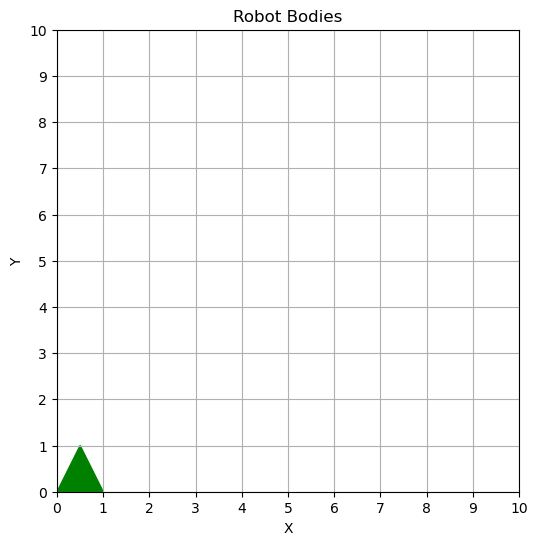

In [48]:
def create_polygon(vertices):
    """
    Create a polygonal body represented by an array of 2D vertices.

    Parameters:
    - vertices (list of tuple): A list of (x, y) coordinates defining the polygon corners in order.

    Returns:
    - np.ndarray: An (N, 2) NumPy array representing the polygon.
    """
    return np.array(vertices)

def plot_polygons(polygons, colors=None, labels=None, title="Robot Bodies"):
    """
    Plot multiple polygons on a fixed 10x10 field.

    Parameters:
    - polygons (list of np.ndarray): List of (N, 2) arrays of vertices.
    - colors (list of str): Optional list of colors for each polygon.
    - labels (list of str): Optional list of labels for the legend.
    - title (str): Plot title.
    """
    plt.figure(figsize=(6, 6))
    
    for i, poly in enumerate(polygons):
        closed_poly = np.vstack([poly, poly[0]])
        color = colors[i] if colors and i < len(colors) else 'blue'
        label = labels[i] if labels and i < len(labels) else f"Polygon {i+1}"
        plt.fill(closed_poly[:, 0], closed_poly[:, 1], color=color, label=label)
    
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xticks(np.arange(0, 11, 1))
    plt.yticks(np.arange(0, 11, 1))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.show()

# Create a triangle shaped
triangle_vertices = [(0, 0), (1, 0), (0.5, 1)]
triangle = create_polygon(triangle_vertices)
plot_polygons([triangle], colors=['green'], labels=['Triangle Bot'])

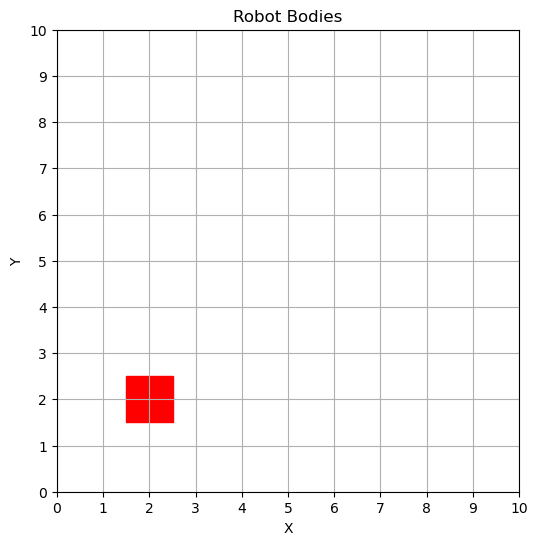

In [49]:
square_vertices = [(1.5, 1.5), (2.5, 1.5), (2.5, 2.5), (1.5, 2.5)]
square = create_polygon(square_vertices)
plot_polygons([square], colors=['red'], labels=['Square Bot'])

### Transforming a Robot Model
We have defined our world $\mathcal{W}$ to be a subset of $\mathbb{R}^2$ and our robot $A \subseteq \mathbb{R}^2$. Since we have chosen the polygonal representation for our body, $A$ is a finite set.

A rigid-body transformation is a function $h:A \to \mathcal{W}$, that maps every point of our body into a point in our world. To be a valid transformation, $h$ needs to fulfill two additional requirements:
- for any pair of points $p_1, p_2 \in A$, $|p_1 - p_2| = |h(p_1) - h(p_2)|$
- the orientation of $A$ must be preserved (mirror images are not allowed).

We can generalize our function $h$ to accept two kinds of variables: a parameter vector and a point from the body $a \in A$. Here, we will introduce two types of parameterized transformations: translation and rotation

### Frames
A coordinate frame (or short frame), is a reference system that defines an origin point in space, and a set of basis vectors that define the directions of our axes (e.g., x, y in $\mathbb{R}^2$). 

As we previously discussed, we do not directly define $A$ in $\mathcal{W}$. Instead, when we define $A$, it is defined in terms of a body frame. A robot with multiple links will have one body frame for each link, which are then transformed relative to each other. The world frame is defined by $\mathcal{W}$. It is the abstraction we choose for our world. 

### 2D Transformations - Translations
<div style="text-align: center;">
    <img src="images/translation.png" height="300" />
    
Example of a transformation (translation) of a robot body.
</div>

We will now start with our first transformation: the translation. A rigid body $A \subset \mathbb{R}^2$ is translated by using two parameters: $x_t$ and $y_t\in \mathbb{R}$ (we will refer to them as `dx` and `dy` in code).

A translation $h$ by $x_t, y_t$ is then simply defined as:

$$
h(x,y) = (x+x_t, y+y_t).
$$

We denote the translated robot as $A(x_t,y_t)$. a translation by $(0,0)$ is an identity transformation (i.e., $A(0,0) = A$).

We can see, that we have a maximum of two coordinates by which we can do translations, this means that the degrees of freedom of our translation is 2.

### Coding Task 4.2 - Translate Bodies
Implement a function that translates the robot body by a given offset. 

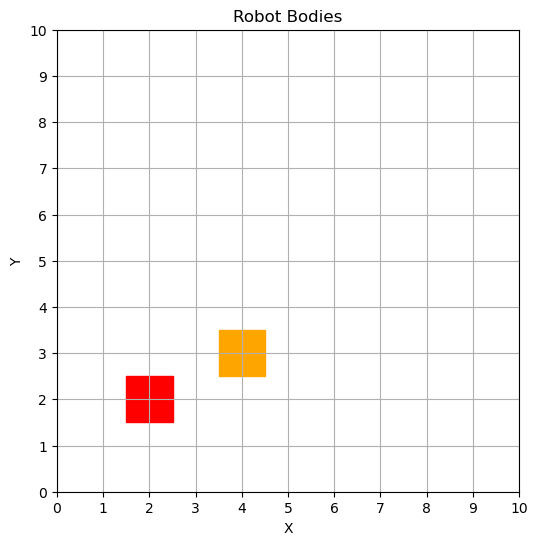

In [50]:
def translate_polygon(polygon, dx, dy):
    """
    Translate a polygonal body by a given offset.

    Parameters:
    - polygon (np.ndarray): An (N, 2) array of vertex coordinates.
    - dx (float): Translation in x-direction.
    - dy (float): Translation in y-direction.

    Returns:
    - np.ndarray: The translated polygon as an (N, 2) array.
    """
    # Add code here
    return polygon + np.array([dx, dy])


# Translate the square robot
translated_square = translate_polygon(square, dx=2, dy=1)

# Visualize both
plot_polygons([square, translated_square], colors=['red', 'orange'], labels=['Original', 'Translated'])

### 2D Transformations - Rotations
Our second type of parameterised 2D transformation is the rotation.
A robot $A$ can be rotated counterclockwise by some angle $\theta \in [0, 2\pi)$ by mapping every $(x,y) \in A$ as:

$$
(x,y) \mapsto ( x \cos \theta - y \sin \theta, x \sin \theta + y \cos \theta)
$$

We can also represent this as a 2D transformation matrix:
$$
R(\theta) = \begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}
$$

and then re-write our operation as:
$$
\begin{pmatrix}
x \cos\theta - y \sin\theta \\
x \sin\theta + y \cos\theta
\end{pmatrix}
= R(\theta)
\begin{pmatrix}
x \\
y
\end{pmatrix}.
$$

Rotation is always performed about the origin! Thus, when we model our robot $A$, we should make sure, that the origin is placed around the intended axis of orientation. 

### Coding Task 4.3 - Rotate Bodies
Now it's time to implement rotational transformations for your robots. To do so, you can use numpy to implement the rotation matrix that we just introduced.

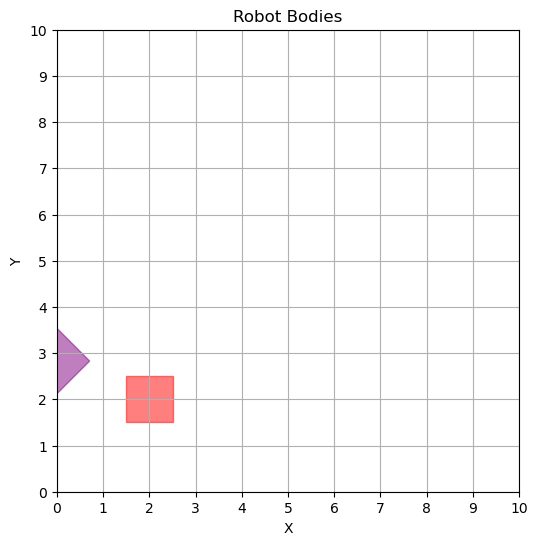

In [17]:
def rotate_polygon(polygon, theta):
    """
    Rotate a polygon counterclockwise by theta radians around the origin.

    Parameters:
    - polygon (np.ndarray): An (N, 2) array of vertex coordinates.
    - theta (float): Rotation angle in radians.

    Returns:
    - np.ndarray: The rotated polygon as an (N, 2) array.
    """
    # Add code here
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                 [np.sin(theta),  np.cos(theta)]])
    return polygon @ rotation_matrix.T

# Rotate by 45 degrees (π/4 radians)
rotated_square = rotate_polygon(square, np.pi / 4)

# Plot both
plot_polygons([square, rotated_square], colors=['red', 'purple'], labels=['Original', 'Rotated 45°'])

### Homogenous Transformation Matrices

We can combine both, a translation and a rotation transformation, into one single matrix. The naive way of doing so is to just perform the translation inside the rotation matrix:
$$
\begin{pmatrix}
x \cos\theta - y \sin\theta + x_t \\
x \sin\theta + y \cos\theta + y_t
\end{pmatrix}
$$

However, we can turn this into a bit of a more efficient form. The following matrix operation yields the same results as the one above, for the first and second entry of the resulting vector: 
$$
\begin{pmatrix}
\cos\theta & -\sin\theta & x_t \\
\sin\theta & \cos\theta & y_t \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
=
\begin{pmatrix}
x \cos\theta - y \sin\theta + x_t \\
x \sin\theta + y \cos\theta + y_t \\
1
\end{pmatrix}.
$$

That means, that we have found a representation through which we can apply a rotation followed by a translation (importantly in that order, they do not commute!) as a single matrix multiplication. We call this $T$, the Homogenous Transformation Matrix for 2D space:

$$
T = \begin{pmatrix}
\cos\theta & -\sin\theta & x_t \\
\sin\theta & \cos\theta & y_t \\
0 & 0 & 1
\end{pmatrix}
$$

We denote the robot transformed by this operation as $A(x_t, y_t, \theta)$. Giving us 3 degrees of freedom. 

The reason why we need to expand the operation to a $3 \times 3$ matrix, is that in $\mathbb{R}^3$ it is just a linear transformation. This trick of increasing the dimensions is common in projective geometry.

### Coding Task 4.4 - Rotate and Translate with One Operation
We've just learned that rotation and translation can be applied at the same time using a homogenous transformation matrix $T$. By using this type of transformation matrix, we can stack a series of transformations and combine them into basically one operation. This also has the benefit of reducing our operation to just matrix multiplication, which can also be efficiently computed on modern compute hardware. 

Since we work in 2D space, and $T$ is a $3\times 3$ matrix, we need to first change the dimensionality of our coordinates in our polygon before we can apply the homogenous transformation matrix. Do this in the function `apply_transform`. Then fill in the missing parameters for $T$

Note that in NumPy the function `@` is a matrix multiplication, and `matrix.T` on a `np.ndarray` `matrix` is the transformation.

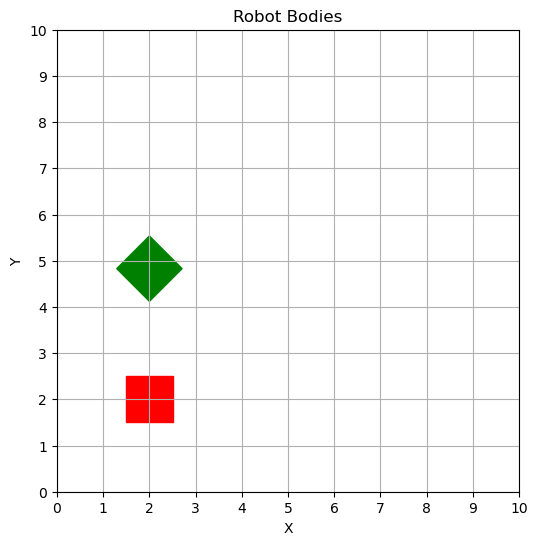

In [57]:
def apply_transform(polygon, transform):
    """
    Apply a 2D homogeneous transformation matrix to a polygon.

    Parameters:
    - polygon (np.ndarray): An (N, 2) array of vertex coordinates.
    - transform (np.ndarray): A (3, 3) homogeneous transformation matrix.

    Returns:
    - np.ndarray: The transformed polygon as an (N, 2) array.
    """
    # Convert polygon to homogeneous coordinates
    ones = np.ones((polygon.shape[0], 1))
    homogeneous_polygon = np.hstack((polygon, ones))
    
    # Apply transformation
    transformed_polygon = homogeneous_polygon @ transform.T
    
    # Convert back to Cartesian coordinates
    return transformed_polygon[:, :2] / transformed_polygon[:, 2][:, np.newaxis]

# Create transformation: rotate 45° and translate by (2, 2)
cos_t, sin_t = np.cos(np.pi / 4), np.sin(np.pi / 4)
dx = 2
dy = 2
T = np.array([[cos_t, -sin_t, dx],
              [sin_t,  cos_t, dy],
              [0,      0,     1]])

# Apply transformation
transformed_square = apply_transform(square, T)

# Plot original and transformed
plot_polygons([square, transformed_square], colors=['red', 'green'], labels=['Original', 'Transformed'])

## Task 5: Kinematic Chains of Bodies in 2D

In the previous task we looked into transformations for whole robots in 2D space, using homogenous transformation matrices $T$. These allow us to perform a sequence of one rotation and one translation operations in a row.

Usually, we can't or don't want to move the whole robot at once. Instead, our robot consists of a set of different parts, joined to gether by joints. In 2D space, we usually have two types of these joints: prismatic (translational) or revolute (rotational) joints. Another way of viewing joints is to consider them as restriction to the degrees of freedom with respect to the other parts. We will now look into how we can compute transformations for a kinematic chain of bodies in 2D space in this task. 

### Attaching Bodies
<div style="text-align: center;">
    <img src="images/joints.png" height="250" />
    
Two common types of 2D joints: a revolute joint allows one link to rotate with respect to the other, a prismatic joint allows one link to translate with respect to the other.
</div>

The general idea behind building a chain of kinematic transformations is that we need to apply all transformations to the previous links, to the following links, leading to a longer chain of transformation operations. 

Let $A_1, A_2, ..., A_m$ denote a set of $m$ links. For each $i$ such that $1 \leq i < m$, link $A_i$ is attached to link $A_{i+1}$. Attachement here means, that we restrict the motion with of $A_{i+1}$ with respect to $A_i$. The way we express these constraints is in the form of joints. 

Assume that we have a robot consisting of two links $A_1, A_2$, linked by a revolute joint. Assume further that the point $(0,0)$ in the body frame of $A_2$ is permanently fixed ot the point $(x_a, y_a)$ in the body frame of $A_1$. This implies the translation of $A_2$ is completely determined once $x_a$ and $y_a$ are given. This means that attaching a link can be expressed as a series of transformation operations: first we need to model the offset of $A_2$ relative to the body frame of $A_1$, then we can perform our rotational operation, before we then apply the translation relative to $A_2$'s origin in it's body frame. Finally, we also need to apply any translation applied on $A_1$ onto $A_2$.


### Homogenous Transformation for 2D chains
With our transformation operations $T_1, T_2, ..., T_j$ defined, we can now build our combined transformation operation, by repeatedly applying the transformation matrix $T$:
$$
T = T_j \cdot ... \cdot T_2 \cdot T_1
$$

and 

$$
T 
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$
Note that the operations do not commute and are applied from right to left.

### Example with 3 Links
<div style="text-align: center;">
    <img src="images/chains.png" width="600" />
    
The body frame of each $A_i$, for $1 < i < m$ is based on the joints htat connect $A_i$ to $A_{i-1}$ and $A_{i+1}$.
</div>

Let's briefly consider the following example with three links and two rotational joints. We want to determine the configuration for link $A_3$ as depicted in (a). Let's assume $A_1$ is in its initial configuration. The other links are each offset by $\pi /4$ from the previous link, the links are attached at their respective end points. Applying $T_3$, causes a rotation of $\theta_3$ and a translation by $a_2$. This places $A_3$ in it's appropriate configuration with respect to $A_2$. The application of $T_2$ to the previous result places both $A_3$ and $A_2$ in their proper configurations with respect to $A_1$.

### Coding Task 5.1 - Example with 2 Links and 1 Rotational Joints
Now we will finally combine everything we've learned to build a robot with one rotational joint. First, since we need multiple transformation matrices, we will write a function `create_transform`, that computes the transformation matrices for us.

Then, we will write a function `draw_two_link_arm`, that will (given the length of the base link, $A_1$, the length of the arm link $A_2$, and a joint angle value $\theta$), compute and render the positions.

In the function you will first create $A_1$, then you can apply an arbitrary transformation on it to put it into the world. Then you will create $A_2$.

For $A_2$, you will have to apply a series of transformations. First you will have to transform it by the transform of your first link $A_1$, then you need to transform it to the position of your joint on $A_1$ (i.e., the right end of it). Now you can apply your rotation, this will rotate it around the center of your body. Thus, you need to translate it to offset the link position on $A_2$.

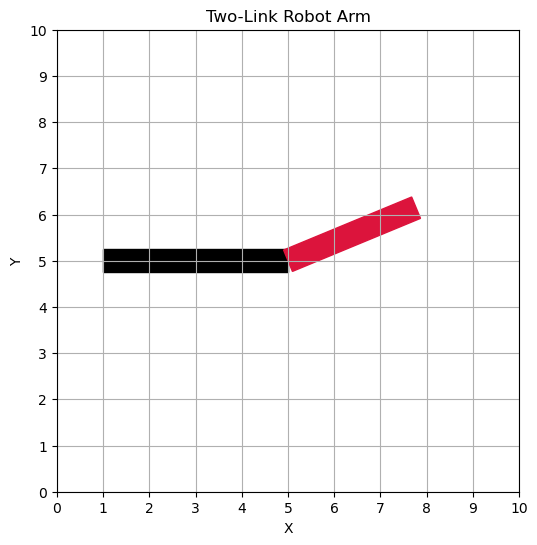

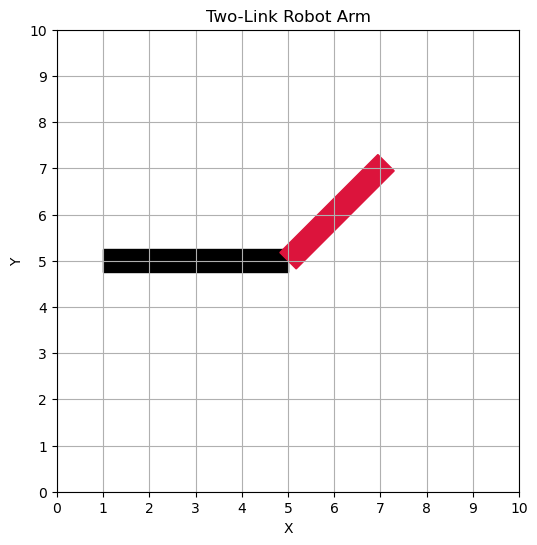

In [64]:
def create_transform(theta, dx, dy):
    """
    Construct a 2D homogeneous transformation matrix.

    Parameters:
    - theta (float): Rotation angle in radians.
    - dx (float): Translation in x-direction.
    - dy (float): Translation in y-direction.

    Returns:
    - np.ndarray: A (3, 3) homogeneous transformation matrix.
    """
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    return np.array([[cos_t, -sin_t, dx],
                     [sin_t,  cos_t, dy],
                     [0,      0,     1]])

def draw_two_link_arm(base_length, arm_length, joint_angle):
    """
    Create and visualize a 2-link arm with a revolute joint.

    Parameters:
    - base_length (float): Length of the first link A₁.
    - arm_length (float): Length of the second link A₂.
    - joint_angle (float): Rotation angle of A₂ in radians.
    """
    # Link A₁ (base)
    width = base_length
    height = 0.5
    A1 = create_polygon([
        (-(width/2), -(height/2)), ((width/2), -(height/2)), ((width/2), (height/2)), (-(width/2), (height/2))
    ])
    T_A1 = create_transform(theta=0.0, dx=3.0, dy=5.0)
    A1_world = apply_transform(A1, T_A1)

    # Link A₂ (child)
    # Add code here 
    width = arm_length
    A2 = create_polygon([
        (-(width/2), -(height/2)), ((width/2), -(height/2)),
        ((width/2),  (height/2)), (-(width/2),  (height/2))
    ])

    # ── HERE: build A₂’s local transform relative to A₁ ──
    # 1) rotate by joint_angle about the joint
    # 2) translate along A₁’s x‑axis by base_length
    T_local_A2 = create_transform(theta=joint_angle, dx=0, dy=0)
    T_offset = create_transform(theta=0.0, dx=(np.cos(joint_angle)*(arm_length/2))+base_length/2, dy=np.sin(joint_angle)*(arm_length/2))

    # 3) chain onto T_A1
    T_A2 = T_A1 @ T_offset @ T_local_A2
    A2_world = apply_transform(A2, T_A2)

    # Plot both links
    plot_polygons(
        [A1_world, A2_world],
        colors=['black', 'crimson'],
        labels=['Link A₁', 'Link A₂'],
        title="Two-Link Robot Arm"
    )

draw_two_link_arm(base_length=4.0, arm_length=3.0, joint_angle=np.pi / 8)
draw_two_link_arm(base_length=4.0, arm_length=3.0, joint_angle=np.pi / 4)

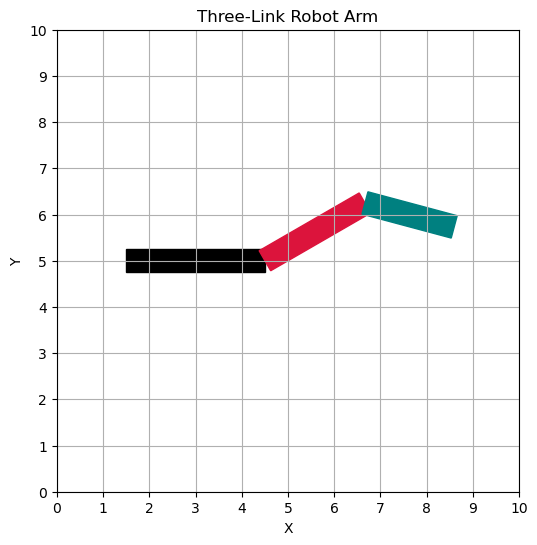

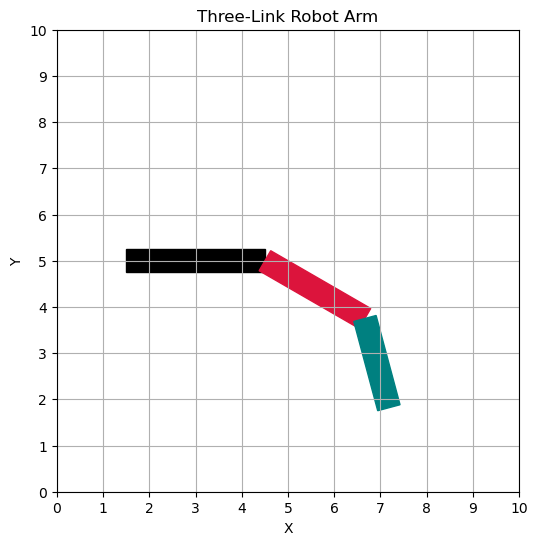

In [66]:
def draw_three_link_arm(l1, l2, l3, theta2, theta3):
    """
    Visualize a 3-link robot arm with two revolute joints.

    Parameters:
    - l1, l2, l3 (float): Lengths of links A₁, A₂, and A₃.
    - theta2 (float): Joint angle at the base of A₂ (relative to A₁).
    - theta3 (float): Joint angle at the base of A₃ (relative to A₂).
    """
    #add code here
    width = l1
    height = 0.5
    A1 = create_polygon([
        (-(width/2), -(height/2)), ((width/2), -(height/2)), ((width/2), (height/2)), (-(width/2), (height/2))
    ])
    T_A1 = create_transform(theta=0.0, dx=3.0, dy=5.0)
    A1_world = apply_transform(A1, T_A1)

    # Link A₂ (child)
    # Add code here 
    width = l2
    A2 = create_polygon([
        (-(width/2), -(height/2)), ((width/2), -(height/2)),
        ((width/2),  (height/2)), (-(width/2),  (height/2))
    ])

    # ── HERE: build A₂’s local transform relative to A₁ ──
    # 1) rotate by joint_angle about the joint
    # 2) translate along A₁’s x‑axis by base_length
    T_local_A2 = create_transform(theta=theta2, dx=0, dy=0)
    T_offset = create_transform(theta=0.0, dx=(np.cos(theta2)*(l2/2))+l1/2, dy=np.sin(theta2)*(l2/2))

    # 3) chain onto T_A1
    T_A2 = T_A1 @ T_offset @ T_local_A2
    A2_world = apply_transform(A2, T_A2)

    width = l3
    A3 = create_polygon([
        (-(width/2), -(height/2)), ((width/2), -(height/2)),
        ((width/2),  (height/2)), (-(width/2),  (height/2))
    ])

    # ── HERE: build A₂’s local transform relative to A₁ ──
    # 1) rotate by joint_angle about the joint
    # 2) translate along A₁’s x‑axis by base_length
    T_local_A3 = create_transform(theta=theta3, dx=0, dy=0)
    T_offset = create_transform(theta=0.0, dx=(np.cos(theta3)*(l3/2))+l2/2, dy=np.sin(theta3)*(l3/2))

    # 3) chain onto T_A1
    T_A3 = T_A2 @ T_offset @ T_local_A3
    A3_world = apply_transform(A3, T_A3)

    # Plot all links
    plot_polygons(
        [A1_world, A2_world, A3_world],
        colors=['black', 'crimson', 'teal'],
        labels=['Link A₁', 'Link A₂', 'Link A₃'],
        title="Three-Link Robot Arm"
    )

draw_three_link_arm(
    l1=3.0, l2=2.5, l3=2.0,
    theta2=np.pi / 6,
    theta3=-np.pi / 4
)
draw_three_link_arm(
    l1=3.0, l2=2.5, l3=2.0,
    theta2=-np.pi / 6,
    theta3=-np.pi / 4
)

### Submission Checklist
- [ ] Complete Task 4, and 5 and all their coding tasks